# MNIST ASSIGNMENT:

We need to:

- write comments for all the cells

-  define a new network such that:

  - it has less than 20000 parameters
  
  - it achieves validation accuracy of more than 99.4% (basically print(score) should be more than 0.994)

- Once done, upload the link to your Github Project to LMS.


## Getting things ready!

We set seed so not to lose our progress due to randomness.

We later on the following libraries:

1. Keras ([Keras Documentation](https://keras.io/)) :- Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
We import keras layers, model type Sequential (since we will be building a sequential model), and utils for plotting model and for converting single class to categorical 10 classes.

2. We also import Train_test_split, Model checkpoints to save the model and ImageDataGenerator just to create a batch flow into the network. **(We are not using any augumentation techniques & other tuning parameters)**.

The whole model is in itself is most basic & default.

In [0]:
import numpy as np
np.random.seed(25)

In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from keras.models import (Sequential,
                          load_model)

from keras.layers import (Dropout,
                          Activation,
                          Flatten,Conv2D,
                          MaxPooling2D,
                          BatchNormalization)

from keras.utils import (np_utils,
                         plot_model)

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import datetime

from keras.datasets import mnist

## Load pre-shuffled MNIST data into Train set and Test set

After loading the Train and Test sets, we initially plot any one image from the Train set and see how the images really look like. 

We then reshape our data into 28x28x1, which would be input to our network. Here 28x28 is the image Height x Width and 1 is the number of channels. We also standardise our pixel (range: 0-255) values so as to obtain normally distributed pixel values between range 0-1, and also due to computational reasons.

We explore total number of digits on each class and then, convert our target variable into categorical 10 classes output, where each bit is set to 1 corresponding to the actual digit value. 

- Example: if the digit value is 6, then the 6th column is set to 1 and the rest 9 columns are set to 0.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


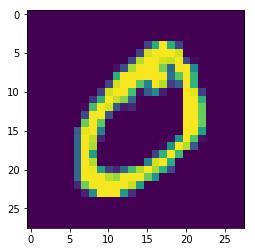

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Exploratary Data Analysis : 

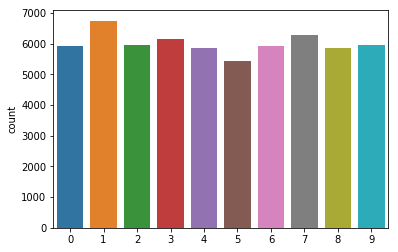

In [8]:
sns.countplot(y_train)

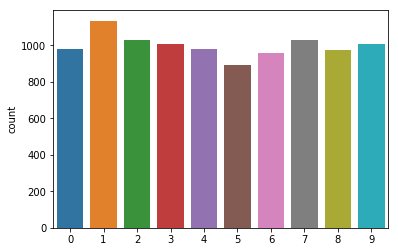

In [9]:
sns.countplot(y_test)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Architecture:

General block (each tuple is one block) architecture followed in this notebook is : 

**INPUT => (CN>BN>CN>BN>MP>DP) => (CN>BN>CN>BN>CN>BN>MP>DP) => (CN>CN>BN) => OUTPUT**


Before laying down the architectures, Let's understand some new terminologies.

1. **Batch Normalization** : Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. [keras_normalization](https://keras.io/layers/normalization/) and it produces best results when batch normalization is sandwiched between linear and non linear layers.  [Where to call/use Batch Normalization](https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras)

2. **Flatten** : 
<img src="https://i.stack.imgur.com/Wk8eV.png">

3. **Dropout** : Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass. [More on dropouts](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

## Layout from here :

We do the following things in the following few blocks :

1. We build the model as defind above.

2. We plot the summary of the model and also an Image defining the whole architecture and its connections.

3. We compile the model and train it for 20 epochs.

4. We evaluate the model and print the score.

5. We plot the Accuracy and Loss graphs and then check the kernels (how do they look and type of features they extracted) of 1st convolution layer.

In [0]:
model = Sequential()

model.add(Conv2D(16, kernel_size = 3, activation='relu',name="Conv2D_1", input_shape = (28, 28, 1)))
model.add(BatchNormalization(name="BatchNormalization_1"))
model.add(Conv2D(32, kernel_size = 3,name="Conv2D_2", activation='relu'))
model.add(BatchNormalization(name="BatchNormalization_2"))
model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_1"))
model.add(Dropout(0.25))

model.add(Conv2D(16, kernel_size = 3,name="Conv2D_3", activation='relu'))
model.add(BatchNormalization(name="BatchNormalization_3"))
model.add(Conv2D(16, kernel_size = 3,name="Conv2D_4", activation='relu'))
model.add(BatchNormalization(name="BatchNormalization_4"))
model.add(Conv2D(32, kernel_size = 3,name="Conv2D_5", activation='relu'))
model.add(BatchNormalization(name="BatchNormalization_5"))
model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_2"))
model.add(Dropout(0.25))

model.add(Conv2D(24,kernel_size=(1,1),name="Conv2D_6"))
model.add(Conv2D(10, kernel_size = 3,name="Conv2D_7", activation='relu'))
model.add(BatchNormalization(name="BatchNormalization_6"))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
BatchNormalization_1 (BatchN (None, 26, 26, 16)        64        
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
BatchNormalization_2 (BatchN (None, 24, 24, 32)        128       
_________________________________________________________________
MaxPool2D_1 (MaxPooling2D)   (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 10, 10, 16)        4624      
__________

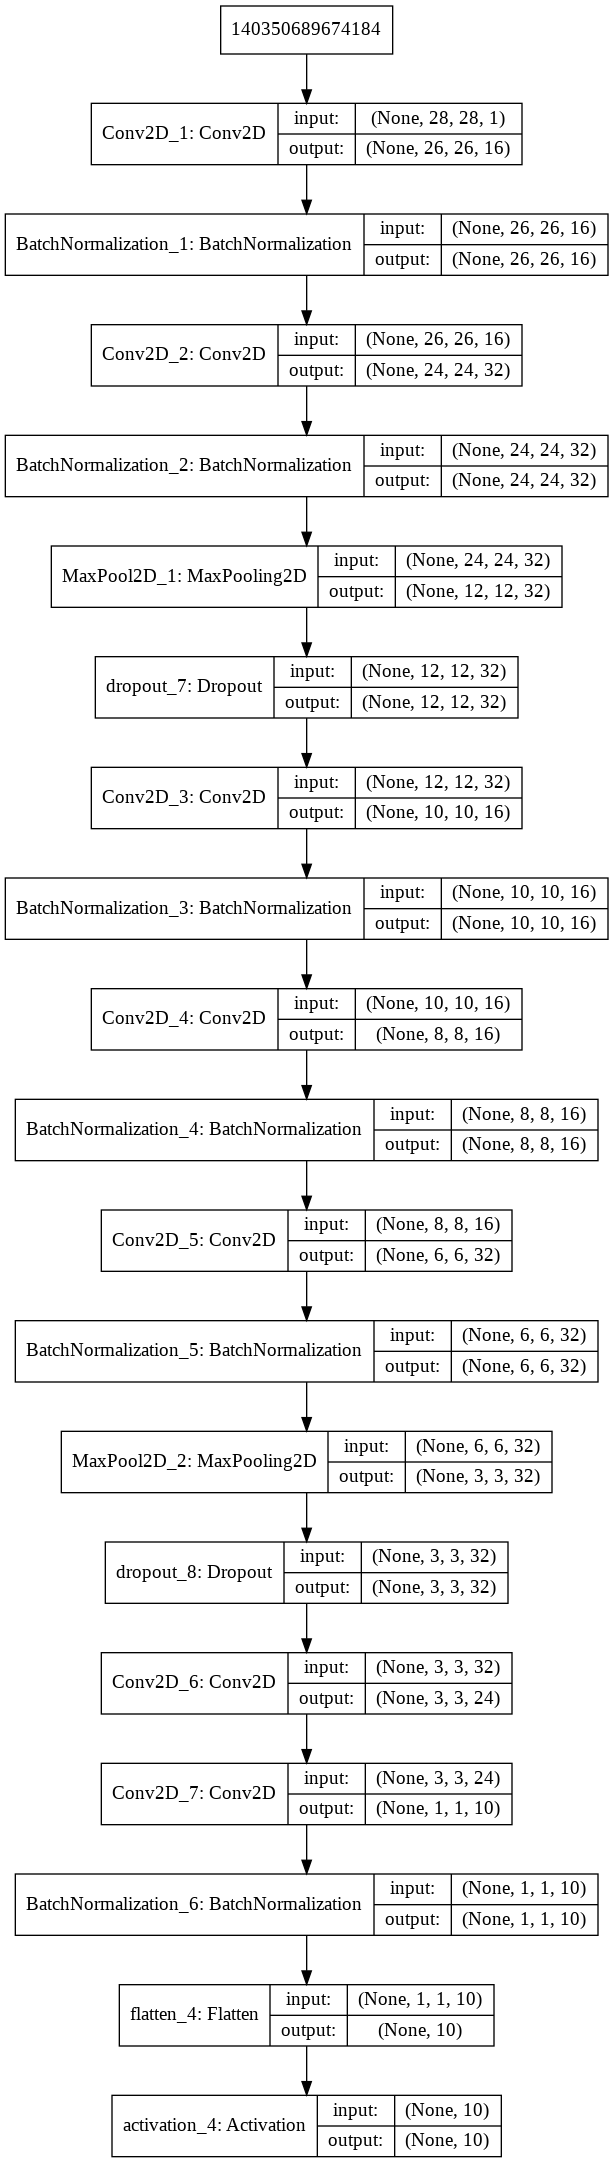

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=256, validation_data=(X_test, Y_test), nb_epoch=20, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.6317 - acc: 0.8780 - val_loss: 0.2367 - val_acc: 0.9739
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2751 - acc: 0.9708 - val_loss: 0.1740 - val_acc: 0.9830
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1857 - acc: 0.9803 - val_loss: 0.1138 - val_acc: 0.9878
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1376 - acc: 0.9841 - val_loss: 0.0887 - val_acc: 0.9905
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1082 - acc: 0.9863 - val_loss: 0.0694 - val_acc: 0.9897
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0883 - acc: 0.9875 - val_loss: 0.0662 - val_acc: 0.9910
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0746 - acc: 0.9889 - val_loss: 0.0473 - val_acc

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.019005459026247264, 0.995]


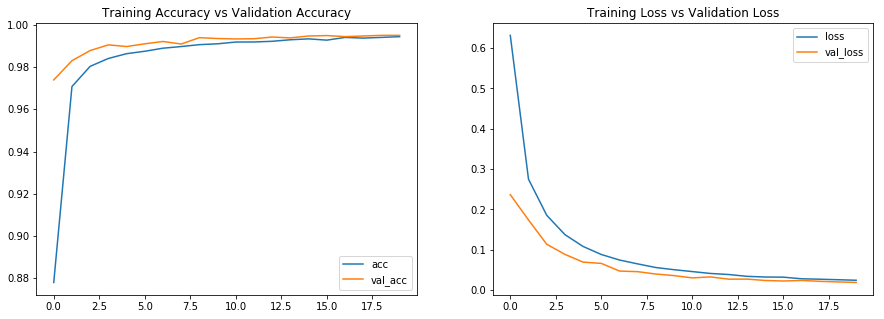

In [0]:
def plot_(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    f, [ax1, ax2] = plt.subplots(1,2, figsize=(15, 5))
    ax1.plot(range(len(acc)), acc, label="acc")
    ax1.plot(range(len(acc)), val_acc, label="val_acc")
    ax1.set_title("Training Accuracy vs Validation Accuracy")
    ax1.legend()

    ax2.plot(range(len(loss)), loss, label="loss")
    ax2.plot(range(len(loss)), val_loss, label="val_loss")
    ax2.set_title("Training Loss vs Validation Loss")
    ax2.legend()
    
    
plot_(model.history)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.05666627e-04 2.29581739e-04 2.29043551e-04 2.14625863e-04
  2.11725230e-04 1.93598607e-04 2.01869378e-04 9.98082161e-01
  2.18617832e-04 2.12991581e-04]
 [1.11109352e-04 1.24029233e-04 9.98970628e-01 1.15949479e-04
  1.14382332e-04 1.04589715e-04 1.09058026e-04 1.17032418e-04
  1.18105992e-04 1.15066578e-04]
 [3.46069719e-04 9.96794879e-01 3.85405205e-04 3.61144776e-04
  3.56263947e-04 3.25762812e-04 3.39680148e-04 3.64517997e-04
  3.67861969e-04 3.58395017e-04]
 [9.98785079e-01 1.32172223e-04 1.31862369e-04 1.23561971e-04
  1.21891950e-04 1.11456415e-04 2.20863716e-04 1.24716025e-04
  1.25860082e-04 1.22621132e-04]
 [2.28157136e-04 2.54687213e-04 2.54090148e-04 2.38095861e-04
  9.97867107e-01 2.14769199e-04 2.23944618e-04 2.40319612e-04
  2.42524358e-04 2.36283086e-04]
 [2.42557348e-04 9.97753561e-01 2.70127406e-04 2.53123610e-04
  2.49702454e-04 2.28324658e-04 2.38079199e-04 2.55487714e-04
  2.57831387e-04 2.51196179e-04]
 [2.56790430e-04 2.86650233e-04 2.85978284e-04 2.67976691e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

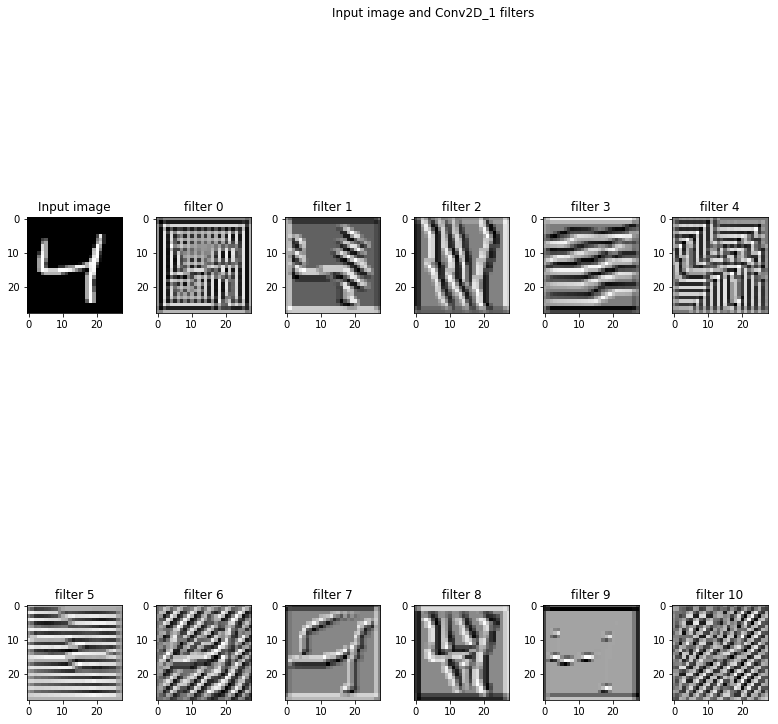

In [0]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'Conv2D_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## N-Batch Architecture

Even though I'm very lazy, i just wanted to try this out.

I have created seperate functions of model, fitting the model and running over different batches.

**The architecture is same as above but one change. In this architecture, I have added One extra batchNormalization layer after ConvolutionLayer_6**

We then run the model and test each batch score against a threshold score (0.9955 in my case).

In [0]:
def __model__(load_model=False, model_name=''):
  
  model = Sequential()

  model.add(Conv2D(16, kernel_size = 3, activation='relu',name="Conv2D_1", input_shape = (28, 28, 1)))
  model.add(BatchNormalization(name="BatchNormalization_1"))
  model.add(Conv2D(32, kernel_size = 3,name="Conv2D_2", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_2"))
  model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_1"))
  model.add(Dropout(0.25))

  model.add(Conv2D(16, kernel_size = 3,name="Conv2D_3", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_3"))
  model.add(Conv2D(16, kernel_size = 3,name="Conv2D_4", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_4"))
  model.add(Conv2D(32, kernel_size = 3,name="Conv2D_5", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_5"))
  model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_2"))
  model.add(Dropout(0.25))

  model.add(Conv2D(24,kernel_size=(1,1),name="Conv2D_6"))
  model.add(BatchNormalization(name="BatchNormalization_7"))
  model.add(Conv2D(10, kernel_size = 3,name="Conv2D_7", activation='relu'))
  model.add(BatchNormalization(name="BatchNormalization_6"))
  model.add(Flatten())
  model.add(Activation('softmax'))

  if load_model:
    model.load_weights(model_name)

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  
  print('\nTOTAL NUMBER OF PARAMETERS : ',model.count_params(),'\n\n')
  
  return model

In [0]:
def cnn_fit(X_train,y_train,X_test,y_test, batch_size=128, epochs = 10, verbose = 1, cnn=0):
  model = __model__()
  
  datagen = ImageDataGenerator()
  
  file_name_model = ("model_"+str(cnn)+".hdf5")
  checkpointer = ModelCheckpoint(monitor='val_acc',
                                   filepath=("./"+file_name_model),
                                   verbose=0, save_best_only=True, mode='max')
    
  
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, 
                              callbacks=[checkpointer],steps_per_epoch=5000,
                              validation_steps=6000,
                              validation_data = datagen.flow(X_test,y_test,batch_size=batch_size),
                              verbose = verbose)

  return(history, model)

In [14]:
%%time

total_cnn=list()
result=0
selection_threshold_score = 0.9955 ## Aiming for Higher Accuracy !
cnn=0

print("LETS AIM FOR ACCURACY GREATER THAN 99.55...")

for batch_size in [128,256,300]:
  print("="*100)
  print('START WITH BATCH SIZE : ', batch_size)

  cnn+=1
  time_start = datetime.datetime.now()
  
  history,model = cnn_fit(X_train, Y_train, X_test, Y_test, 
                           batch_size=batch_size, epochs=10, verbose=1, cnn=cnn)

  print('\nMODEL STATS : '\
          '| LAST TRAINING ACCURACY =', round(history.history['acc'][-1],5), \
          '| MAXIMUM VALIDATION ACCURACY =', round(max(history.history['val_acc']),5),\
          '| TOTAL TIME TAKEN TO COMPLETE : ', (datetime.datetime.now() - time_start),'\n')

  K.clear_session()
  del model

  model = __model__(load_model=True, model_name='model_'+str(cnn)+'.hdf5')

  score = model.evaluate(X_test, Y_test, verbose=0)
  
  # Models selection
  if round(score[1], 5) >= selection_threshold_score:
    total_cnn.append(cnn)
    print('\nSCORE CROSSED THRESHOLD :: 0.9955 < ', round(score[1],5),'\n')
    print('\SCORE AT BATCH SIZE ',batch_size,' IS : ',score)
  else:
    print(' - SKIPPING SCORE SINCE NOT ENOUGH TO CROSS THRESHOLD :: 0.9955 > ', round(score[1],5),'\n')

  K.clear_session()
  del model
  del history
  print('='*100)

LETS AIM FOR ACCURACY GREATER THAN 99.55...
START WITH BATCH SIZE :  128

TOTAL NUMBER OF PARAMETERS :  19930 


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5000/5000 [==============================] - 93s 19ms/step - loss: 0.1169 - acc: 0.9789 - val_loss: 0.0260 - val_acc: 0.9936
Epoch 2/10
5000/5000 [==============================] - 90s 18ms/step - loss: 0.0259 - acc: 0.9928 - val_loss: 0.0212 - val_acc: 0.9934
Epoch 3/10
5000/5000 [==============================] - 89s 18ms/step - loss: 0.0174 - acc: 0.9949 - val_loss: 0.0201 - val_acc: 0.9948
Epoch 4/10
5000/5000 [==============================] - 89s 18ms/step - loss: 0.0141 - acc: 0.9958 - val_loss: 0.0212 - val_acc: 0.9944
Epoch 5/10
5000/5000 [==============================] - 90s 18ms/step - loss: 0.0118 - acc: 0.9963 - val_loss: 0.0263 - val_acc: 0.9933
Epoch 6/10
5000/5000 [==============================] - 88s 18ms/step - loss: 0.0107 - acc: 0.9968 - val_loss: 0.0230 - val_acc: 0.9939
Epoch 7/10
5000/5000 [=

In [16]:
print("MODELS WHICH CROSSED THE THRESHOLD ACCURACY OF 99.55 ARE :")
print(total_cnn)

MODELS WHICH CROSSED THE THRESHOLD ACCURACY OF 99.55 ARE :
[2, 3]


In [1]:
print("HIGHEST VALIDATION ACCURACY : ",0.9957," OR ",99.57,"%")

HIGHEST VALIDATION ACCURACY :  0.9957  OR  99.57 %


I could haved pushed accuracy over 99.60 but then i was too lazy to wait for another few hours. 

**It was good to work with such fine constraints though. It was a hard assignment, no wonder it takes some time to figure out the network. Hoping next challenge would be to achieve 99.60 with less than 20K parameters. It would be very fun to work on.** 